In [10]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
#import statsmodels.api as sm
#from ggplot import *
%matplotlib inline

In [5]:
dataset = datasets.load_boston()

In [6]:
dataset.data.shape

(506, 13)

In [7]:
dataset.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

# Scikit Model

In [51]:
lr = LinearRegression()
lr.fit(dataset.data, dataset.target)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


# Statsmodel

In [64]:
model = sm.OLS(dataset.target, dataset.data)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.100
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           4.72e-07
Time:                        15:45:01   Log-Likelihood:                -2873.9
No. Observations:                 442   AIC:                             5768.
Df Residuals:                     432   BIC:                             5809.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -10.0122    179.967     -0.056      0.9

Coefficient : [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
T values : [-0.05563367 -1.30051168  2.59399425  1.6462086  -0.63118937  0.46685635
  0.15784387  0.36405248  1.45097804  0.34025929]
R^2 : 0.1055975652


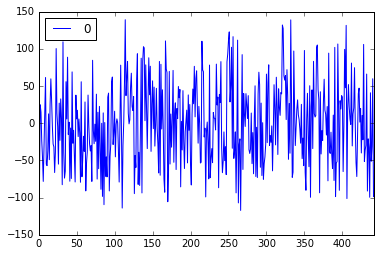

In [118]:
print 'Coefficient :', result.params
print 'T values :', result.tvalues
#print 'T test :', result.t_test()
print 'R^2 :', result.rsquared
pd.DataFrame(result.fittedvalues).plot()

In [30]:
dataT = pd.DataFrame(dataset.target)
dataT.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [33]:
dataD = pd.DataFrame(dataset.data)
dataD.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Validation

In [36]:
expected = dataset.target
toPred = dataset.data

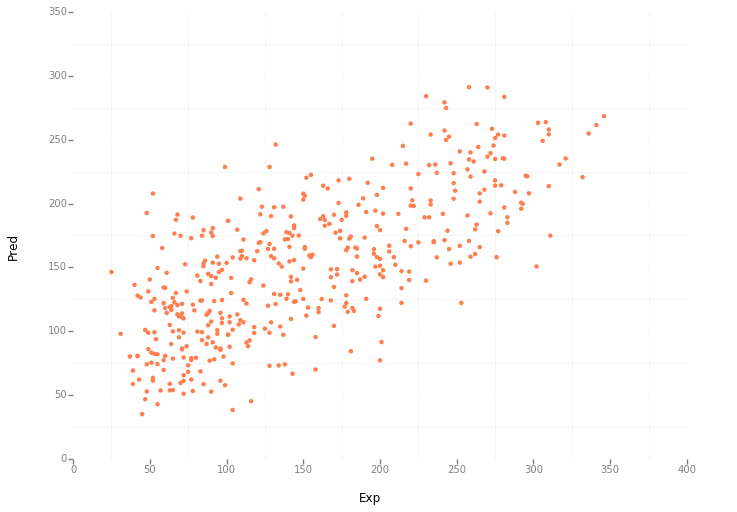

<ggplot: (20400034)>

In [106]:
predict = lr.predict(toPred)
MSE = np.mean((predict - expected)**2)
E = pd.DataFrame(expected, columns= ['Exp'])
P = pd.DataFrame(predict, columns= ['Pred'])
Ep = pd.concat((E, P), axis=1)
ggplot(aes(x='Exp', y = 'Pred'), data=Ep) + geom_point(color = 'coral') + theme_bw()

In [46]:
print 'Intercept :', lr.intercept_
print 'Coefficients :', lr.coef_
print 'MSE :', MSE

Intercept : 152.133484163
Coefficients : [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
MSE : 2859.69039877


In [122]:
#print (lr.score(dataset.data, dataset.target))
#print accuracy_score(dataset.data, dataset.target)

ValueError: Can't handle mix of continuous-multioutput and multiclass